# Artifact 2: Mathematics with Networkx

## What is a network? Contd

Simply put, a network is a map that shows us how different objects are related to each other. 

Last Artifact, we learnt what networks are, how to make them,, and learnt concepts to analyze them. In this artifact, we'll continue learning about networks and dig deeper into their analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

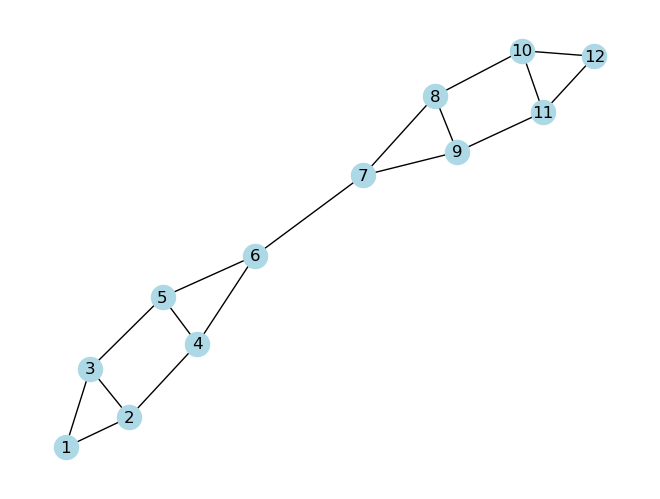

In [2]:
# Re-creating our example network
network = nx.Graph() 
network.add_nodes_from(range(1,13)) 
edgelist = [(1,2), 
            (1,3),
            (2,3),
            (2,4),
            (3,5),
            (4,5),
            (4,6),
            (5,6),
            (6,7),
            (7,8),
            (7,9),
            (8,9),
            (8,10),
            (9,11),
            (10,11),
            (10,12),
            (11,12)]

network.add_edges_from(edgelist) 
positions = nx.spring_layout(network,seed=10) 
nx.draw(network,positions,node_color="lightblue",with_labels=True)

Re-creating our Star Wars Network. 

In [3]:
nodes = pd.read_csv("starwars-characters.csv",index_col=0)

In [4]:
nodes.head()

,name,scenes
number,,
0,DARTH VADER,190
1,R2-D2,171
2,CHEWBACCA,145
3,BB-8,40
4,QUI-GON,62


In [5]:
edges = pd.read_csv("starwars-links.csv")

In [6]:
edges.head()

,character1,character2,scenes
0,0,1,32
1,2,0,2
2,0,20,5
3,0,4,22
4,0,18,41


In [7]:
G = nx.Graph()
G.add_nodes_from(nodes.index)

In [8]:
for index, row in edges.iterrows():
    G.add_edge(row['character1'], row['character2'], weight=row['scenes'])

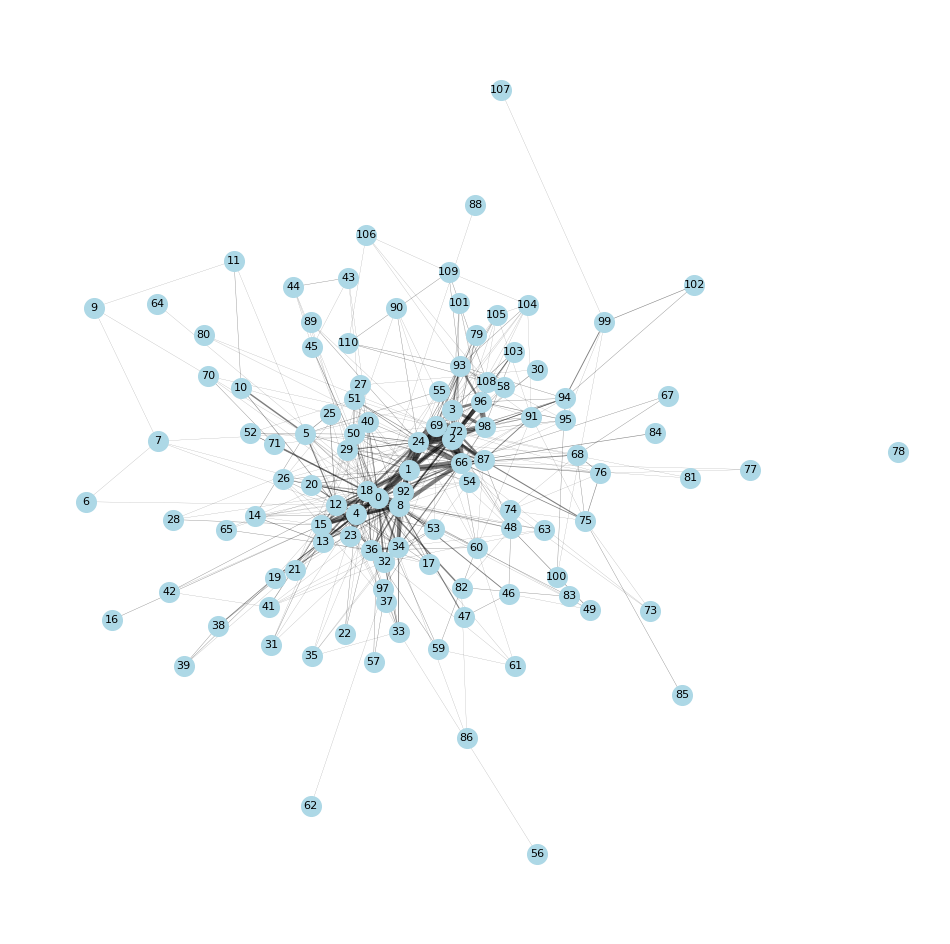

In [9]:
pos = nx.spring_layout(G, k=0.20, iterations=20)  

weights = [G[u][v]['weight'] for u, v in G.edges()]
weight_scale = [w * 10 / max(weights) for w in weights]

plt.figure(figsize=(12, 12))

nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=200)  
nx.draw_networkx_edges(G, pos, alpha=0.5, width=weight_scale)  
nx.draw_networkx_labels(G, pos, font_size=8)  

plt.axis('off')
plt.show()

## Connectivity and routing

Another question we might ask when observing networks is how well-connected they are. An undirected graph is called **connected** if, for every pair $ (i,j) $, there exists a **path** between these two nodes.

Such a path exists if there is a set of links that starts at $ i $ and ends at $ j $.

## Matrix representations

The most common mathematical representation of a network is using its **adjacency matrix**. The adjacency matrix is a square matrix, with one row and one column for each node in the network.

For a simple, unweighted graph, the adjacency matrix has 0’s on the diagonal, and a 1 in the $ (i,j)^{th} $ position if there is a link between node $ i $ and node $ j $. To refer to the adjacency matrix of a graph, we often use the letter $ A $.

Since our graph is undirected, if there is a link from $ i $ to $ j $, then there must also be a link from $ j $ to $ i $. This means that $ A_{ij} = A_{ji} $ for every node $ i $ and $ j $, so the adjacency matrix for an undirected graph will always be symmetric.

Let’s take a look at the adjacency matrix for our example network:

In [10]:
A = nx.adjacency_matrix(network).todense() 
print(A)

[[0 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 0 0 0 0 0 0]
 [0 0 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 1 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 1]
 [0 0 0 0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 0 0 0 0 1 1 0]]


We'll connect the information portrayed in this adjacency matrix to back to the structure of this network and its edgelist.

When we looked at the degree distribution, nodes 1 and 12 each had 2 links. If we look at the first row (or column) of this matrix, we see that there are exactly two entries equal to 1, and the rest are zeros. Same for row/column 12. But every other row/column of the matrix has exactly three 1’s, and the rest of the entries are 0.

Representing a network as a matrix connects the world of graph theory with the world of linear algebra, and gives us a lot of tools that we can use to analyze networks. In fact, the adjacency matrix has more properties that can prove to be very valuable to us. For example, if you want to find the total number of paths of length $ k $ between two nodes, all you have to do is raise the adjacency matrix to the power $ k $, and look at the entry corresponding to the pair of interest.

Length 1 is easy… there is exactly one path of length one to every node you are connected to, and no paths of length one that can connect two nodes who do not share a link. But beyond 1 is when this gets interesting. This let’s us answer questions like the following: “how many shortest paths are there from node 1 to node 12?”

Above, we can see that the shortest path between 1 and 12 contains 7 edges. Let’s see what happens when we raise the adjacency matrix to the power 6.

In [11]:
n_paths = np.linalg.matrix_power(A,6)[0,11]
print("There are", n_paths, "paths of length 6 from node 1 to node 12") 

There are 0 paths of length 6 from node 1 to node 12


As we suspected, the entry in row 1, column 12 is equal to zero. This tells us that there are no paths of length 6 that can connect node 1 to node 12.

How about length 7?

In [12]:
n_paths = np.linalg.matrix_power(A,7)[0,11]
print("There are", n_paths, "paths of length 7 from node 1 to node 12")

There are 4 paths of length 7 from node 1 to node 12


So there are no paths of length 6 that connect node 1 to node 12, but there are exactly 4 paths of length 7.

The graph laplacian is similar to the adjacency matrix, except that the off-diagonal elements are negative and the diagonal elements contain the degree of each node. Equivalently, if we let $ D $ be a diagonal matrix with each diagonal element corresponding to the degree of the corresponding node, then the laplacian matrix $ L $ could be constructed as $ L = D - A $

We can get this matrix for our graph using `nx.laplacian_matrix()`:

In [13]:
L = nx.laplacian_matrix(network).todense()
print(L)

[[ 2 -1 -1  0  0  0  0  0  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0  0  0  0  0]
 [-1 -1  3  0 -1  0  0  0  0  0  0  0]
 [ 0 -1  0  3 -1 -1  0  0  0  0  0  0]
 [ 0  0 -1 -1  3 -1  0  0  0  0  0  0]
 [ 0  0  0 -1 -1  3 -1  0  0  0  0  0]
 [ 0  0  0  0  0 -1  3 -1 -1  0  0  0]
 [ 0  0  0  0  0  0 -1  3 -1 -1  0  0]
 [ 0  0  0  0  0  0 -1 -1  3  0 -1  0]
 [ 0  0  0  0  0  0  0 -1  0  3 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0  0  0  0  0 -1 -1  2]]


## Connectivity and Paths in our Star Wars Network

Let's analyze our network with the learnt information.

In [14]:
A = nx.adjacency_matrix(G).todense() 
print(A)

[[ 0 32  2 ...  0  0  0]
 [32  0 17 ...  0  0  0]
 [ 2 17  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  2  2]
 [ 0  0  0 ...  2  0  2]
 [ 0  0  0 ...  2  2  0]]


The degree distribution shows us that there is one node without a degree, and one with >50 degree. Let's find how many paths connect these 2 nodes.

In [15]:
max_degree_node, max_degree = max(G.degree(), key=lambda item: item[1])
print(f"Node with the most degrees: {max_degree_node}, Degree: {max_degree}")

Node with the most degrees: 0, Degree: 52


In [16]:
min_degree_node, min_degree = min(G.degree(), key=lambda item: item[1])
print(f"Node with the least degrees: {min_degree_node}, Degree: {min_degree}")

Node with the least degrees: 78, Degree: 0


In [17]:
n_paths = np.linalg.matrix_power(A,1)[78,0]
print("There are", n_paths, "paths of length 6 from node 78 to node 0") 

for length in range(1, len(G)):
    num_paths = np.linalg.matrix_power(A, length)[78, 0]
    print(f"There are {num_paths} paths of length {length} from node 78 to node 0")

There are 0 paths of length 6 from node 78 to node 0
There are 0 paths of length 1 from node 78 to node 0
There are 0 paths of length 2 from node 78 to node 0
There are 0 paths of length 3 from node 78 to node 0
There are 0 paths of length 4 from node 78 to node 0
There are 0 paths of length 5 from node 78 to node 0
There are 0 paths of length 6 from node 78 to node 0
There are 0 paths of length 7 from node 78 to node 0
There are 0 paths of length 8 from node 78 to node 0
There are 0 paths of length 9 from node 78 to node 0
There are 0 paths of length 10 from node 78 to node 0
There are 0 paths of length 11 from node 78 to node 0
There are 0 paths of length 12 from node 78 to node 0
There are 0 paths of length 13 from node 78 to node 0
There are 0 paths of length 14 from node 78 to node 0
There are 0 paths of length 15 from node 78 to node 0
There are 0 paths of length 16 from node 78 to node 0
There are 0 paths of length 17 from node 78 to node 0
There are 0 paths of length 18 from no

Hmmm ... 0 paths. Why is that? Well, node 78 has degree 0. And so, it has no links.

With this, we can conclude that our graph is not connected.

In [18]:
nodes_with_degree_two = [node for node, degree in G.degree() if degree == 2]

print("Nodes with degree 2:", nodes_with_degree_two)

Nodes with degree 2: [6, 47, 57, 67, 77, 80, 81, 83, 86, 97, 100, 102]


Let's work with node 80.

In [19]:
for length in range(1, 10):
    num_paths = np.linalg.matrix_power(A, length)[80, 0]
    print(f"There are {num_paths} paths of length {length} from node 80 to node 0")

There are 0 paths of length 1 from node 80 to node 0
There are 13 paths of length 2 from node 80 to node 0
There are 5163 paths of length 3 from node 80 to node 0
There are 1312499 paths of length 4 from node 80 to node 0
There are 321215110 paths of length 5 from node 80 to node 0
There are 75723725925 paths of length 6 from node 80 to node 0
There are 17616459942901 paths of length 7 from node 80 to node 0
There are 4068829378712224 paths of length 8 from node 80 to node 0
There are 936469282054546349 paths of length 9 from node 80 to node 0


We made it interesting by adding a bit of complexity and choosing a node with degree 2 (Node 80) and degree 52 (Node 0). Then we found all paths connecting these two nodes upto length of path 9.

We can see that the no. of paths exponentially increases.

NetworkX has an in-built function `shortest_path()`, that calculates the shortest path between 2 nodes. Let's use this to find the shortest path from all the path options these two nodes have.

In [20]:
shortest_path = nx.shortest_path(G, source=80, target=0)
path_length = len(shortest_path) - 1

print(f"The shortest path from node 80 to node 0 is: {shortest_path}")
print(f"The shortest path length is: {path_length}")

The shortest path from node 80 to node 0 is: [80, 24, 0]
The shortest path length is: 2


Of all the options, the shortest path has length 2.

These two nodes have 13 paths that connect them with length 2. And of those 13 paths, route [80, 24, 0] is the shortest. 

In the next artifact, we'll look at simulating the `shortest_path()` function of Networkx using linear programming.

## References

- Chatox. Networks Science Course: Star Wars Data [starwars-characters.csv, starwars-links.csv]. GitHub repository. [https://github.com/chatox/networks-science-course/tree/master/practicum/data/starwars](https://github.com/chatox/networks-science-course/tree/master/practicum/data/starwars)
- NetworkX Developers. NetworkX Reference Documentation [Software documentation]. NetworkX. [https://networkx.org/documentation/stable/reference/index.html](https://networkx.org/documentation/stable/reference/index.html)
- Newman, Mark. (2018). *Networks*, 2nd ed. Oxford: Oxford University Press. [Online edition](https://doi.org/10.1093/oso/9780198805090.001.0001), accessed 12 Apr. 2024.

- Newman, Mark. (2018). "Mathematics of Networks." In *Networks* (2nd ed.). Oxford University Press. [Online edition](https://doi.org/10.1093/oso/9780198805090.003.0006), accessed 14 Apr. 2024.

- OpenAI. ChatGPT [Software]. Available from https://openai.com/chatgpt